In [42]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
gender_data = pd.read_csv("./gender_classfication_data/gender_classification.csv")
gender_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [44]:
print("Original Data:")
gender_data.head()

Original Data:


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [45]:
gender_data.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [46]:
gender_data.shape

(5001, 8)

In [54]:
gender_mapping = {'Male': 0, 'Female': 1}
gender_data['gender_numeric'] = gender_data['gender'].map(gender_mapping)
gender_data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_numeric
0,1,11.8,6.1,1,0,1,1,Male,0
1,0,14.0,5.4,0,0,1,0,Female,1
2,0,11.8,6.3,1,1,1,1,Male,0
3,0,14.4,6.1,0,1,1,1,Male,0
4,1,13.5,5.9,0,0,0,0,Female,1


Exploratory Data Analysis (EDA)

In [55]:
print (f"Dataset Columns:\n{gender_data.columns}")

Dataset Columns:
Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender',
       'gender_numeric'],
      dtype='object')


In [56]:
gender_data.describe().T

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0
gender_numeric,5001.0,0.500100,0.500050,0.0,0.0,1.0,1.0,1.0


In [57]:
print (f"The dataset size is :{gender_data.shape}")

The dataset size is :(5001, 9)


In [59]:
gender_data[gender_data.duplicated()]

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_numeric
59,1,14.1,5.9,0,0,0,0,Female,1
66,1,14.2,6.2,0,0,0,0,Female,1
175,1,12.7,5.7,1,1,1,1,Male,0
230,1,12.9,5.1,0,0,0,0,Female,1
261,1,13.0,6.2,1,1,1,1,Male,0
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,1
4997,1,11.9,5.4,0,0,0,0,Female,1
4998,1,12.9,5.7,0,0,0,0,Female,1
4999,1,13.2,6.2,0,0,0,0,Female,1


In [60]:
gender_data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
gender_numeric               0
dtype: int64

In [61]:
gender_data.isnull().sum().sum()


0

No missing values

In [62]:
gender_data["gender_numeric"].describe()

count    5001.00000
mean        0.50010
std         0.50005
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: gender_numeric, dtype: float64

In [64]:
gender_data['gender_numeric'].value_counts()

gender_numeric
1    2501
0    2500
Name: count, dtype: int64

<Axes: ylabel='count'>

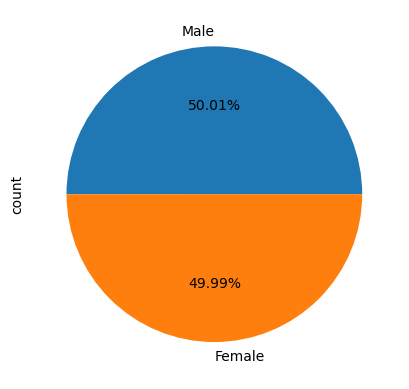

In [75]:
gender_data['gender_numeric'].value_counts().plot(kind="pie",autopct='%0.2f%%' ,labels=['Male','Female'])

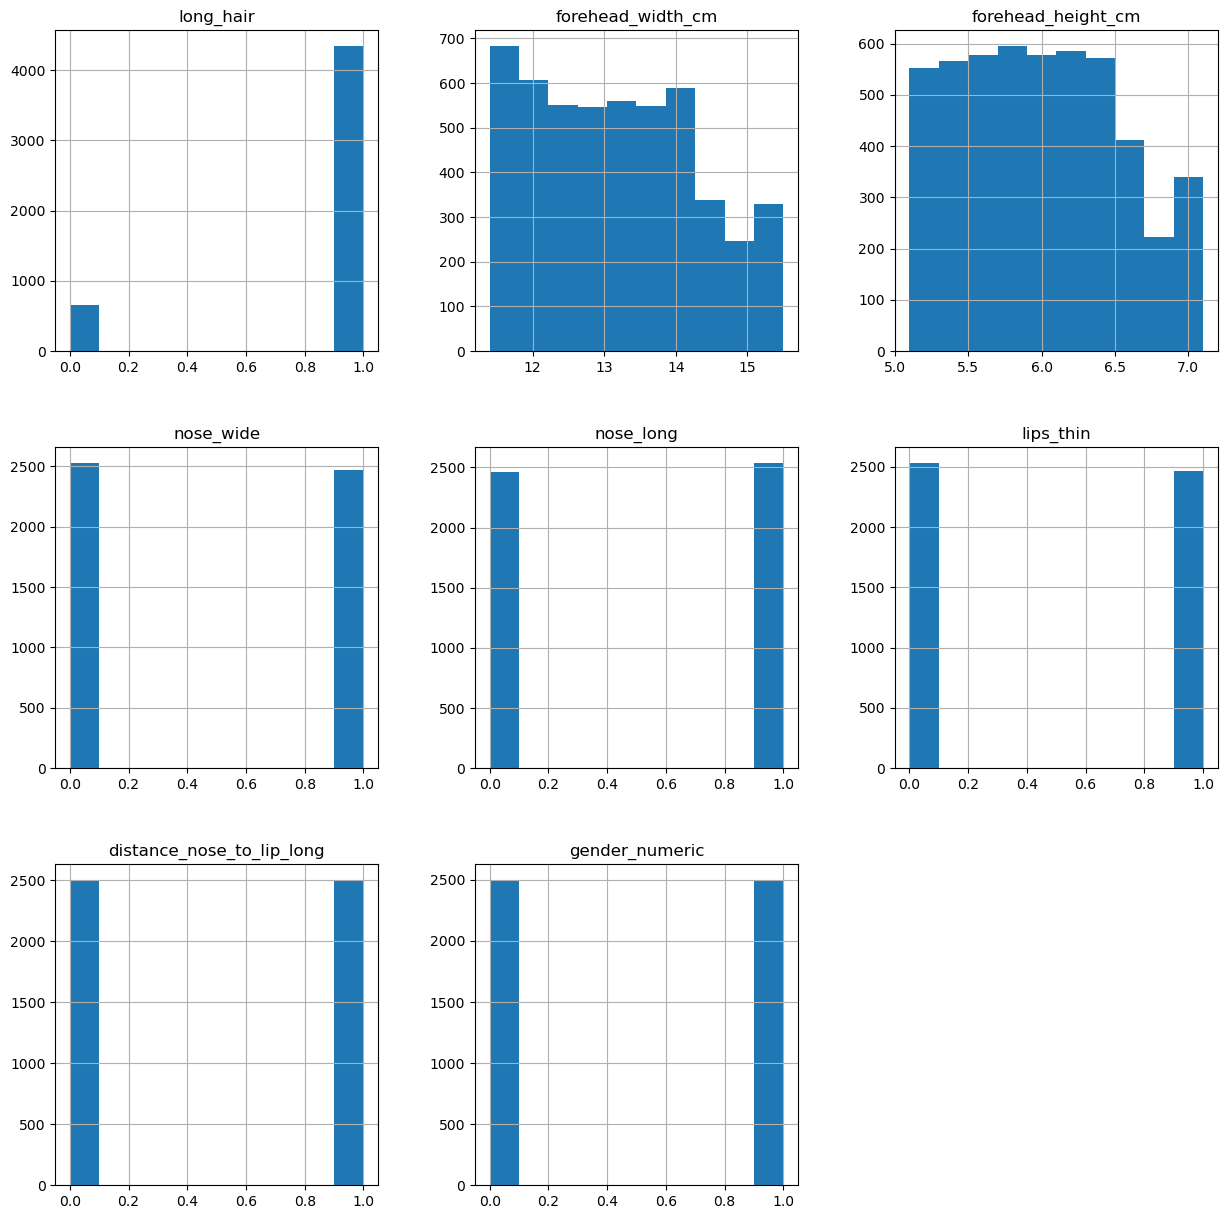

In [74]:
data_hist_plot=gender_data.hist(figsize=(15,15))